# Pairwise Covariance

In [1]:
from scipy.io import loadmat
lfp_buz_features = loadmat('lfp_buz_features.mat')

In [2]:
import pandas as pd
import numpy as np

lfp_matrix = np.array(lfp_buz_features['lfpFeatures'])

numColumns = len(lfp_matrix[0])

delta_pfc_df = pd.DataFrame(lfp_matrix[:, 0], columns=["DeltaPFC"])
theta_hpc_df = pd.DataFrame(lfp_matrix[:, 1], columns=["ThetaHPC"])
beta_pfc_df = pd.DataFrame(lfp_matrix[:, 2], columns=["BetaPFC"])
gamma_hpc_df = pd.DataFrame(lfp_matrix[:, 3], columns=["GammaHPC"])
emg_like_df = pd.DataFrame(lfp_matrix[:, 4], columns=["EMGLike"])

timesteps = 10820

## Pairwise Signal Ratios

In [3]:
delta_pfc_theta_hpc = delta_pfc_df['DeltaPFC'] / theta_hpc_df['ThetaHPC']
delta_pfc_beta_pfc  = delta_pfc_df['DeltaPFC'] / beta_pfc_df['BetaPFC']
delta_pfc_gamma_hpc = delta_pfc_df['DeltaPFC'] / gamma_hpc_df['GammaHPC']
theta_hpc_beta_pfc  = theta_hpc_df['ThetaHPC'] / beta_pfc_df['BetaPFC']
theta_hpc_gamma_hpc = theta_hpc_df['ThetaHPC'] / gamma_hpc_df['GammaHPC']
beta_pfc_gamma_hpc  = beta_pfc_df['BetaPFC'] / gamma_hpc_df['GammaHPC']

## Correlation Matrix

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

pairwise_dfs = pd.concat([
        delta_pfc_theta_hpc, 
        delta_pfc_beta_pfc, 
        delta_pfc_gamma_hpc,
        theta_hpc_beta_pfc,
        theta_hpc_gamma_hpc,
        beta_pfc_gamma_hpc,
        emg_like_df.EMGLike
    ], 
    axis=1,
    keys=['∂/θ', '∂/β', '∂/γ', 'θ/β', 'θ/γ', 'β/γ', 'EMG']
)

correlation_matrix = pairwise_dfs.corr()
correlation_matrix.head()

,∂/θ,∂/β,∂/γ,θ/β,θ/γ,β/γ,EMG
∂/θ,1.000000,0.076000,0.088899,-0.060392,-0.143987,-0.060140,0.113322
∂/β,0.076000,1.000000,0.135147,0.816011,-0.165068,-0.236491,0.180495
∂/γ,0.088899,0.135147,1.000000,-0.097001,0.438689,0.653227,-0.131151
θ/β,-0.060392,0.816011,-0.097001,1.000000,0.153398,-0.127967,-0.044046
θ/γ,-0.143987,-0.165068,0.438689,0.153398,1.000000,0.775282,-0.509706


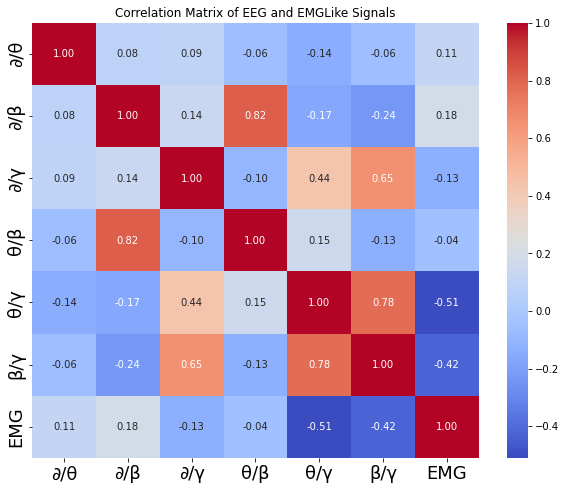

In [5]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f")

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)

plt.title('Correlation Matrix of EEG and EMGLike Signals')
plt.show()